In [63]:
import os
import librosa
import json
import numpy as np
from tqdm import tqdm
import pandas as pd

In [87]:
ac_train_mel_path = "/blob/v-yuancwang/DiffAudioImg/VGGSound/data/ac_train/mel"
ac_train_wav_path = "/blob/v-yuancwang/DiffAudioImg/VGGSound/data/ac_train/wav"
ac_train_mels = os.listdir(ac_train_mel_path)
ac_train_wavs = os.listdir(ac_train_wav_path)

In [88]:
ac_train_mels.sort()
ac_train_wavs.sort()
print(len(ac_train_mels), len(ac_train_wavs))

45435 45435


In [89]:
total_number = 0
for mel_path in tqdm(ac_train_mels[:]):
    mel = np.load(os.path.join(ac_train_mel_path, mel_path))
    if mel.shape[1] < 624:
        mel = np.pad(mel, ((0, 0), (0, 624 - mel.shape[1])), 'wrap')
        np.save(os.path.join(ac_train_mel_path, mel_path), mel)
        total_number += 1
total_number

100%|██████████| 45435/45435 [21:10<00:00, 35.76it/s]


6211

In [90]:
ac_train_mels[:5]

['---1_cCGK4M_0_10000.npy',
 '---lTs1dxhU_30000_40000.npy',
 '--0PQM4-hqg_30000_40000.npy',
 '--1l6WGE7AU_30000_40000.npy',
 '--299m5_DdE_0_10000.npy']

In [91]:
df = pd.read_csv("/home/v-yuancwang/AUDIT_v2/audiosetdl/ac_train.csv", header=None)
id_caption_dict = {}
for id, caption in zip(df[1], df[3]):
    id_caption_dict[id] = caption
print(len(id_caption_dict))

49838


In [93]:
ac_train = []
for mel_path in tqdm(ac_train_mels[:]):
    ac_train.append({"mel": os.path.join(ac_train_mel_path, mel_path),
                    "caption": id_caption_dict[mel_path[:11]]})
print(len(ac_train))
with open("/home/v-yuancwang/AUDIT_v2/medata_infos/ac_train.json", "w") as f:
    json.dump(ac_train, f)

100%|██████████| 45435/45435 [00:00<00:00, 468862.44it/s]


45435


In [ ]:
import matplotlib.pyplot as plt

(80, 413)


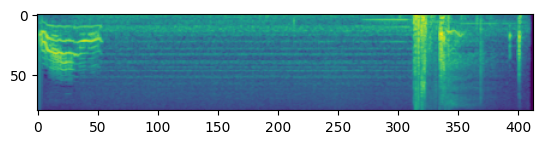

In [51]:
test_mel = np.load(os.path.join(ac_train_mel_path, "-2--Xzix2Vk_0_10000.npy"))
print(test_mel.shape)
plt.imshow(test_mel)

In [52]:
test_mel = np.pad(test_mel, ((0, 0), (0, 624 - test_mel.shape[1])), 'wrap')

(80, 624)


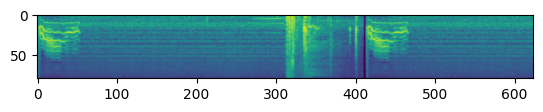

In [53]:
print(test_mel.shape)
plt.imshow(test_mel)